In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Data loading, describing, a few renames 

In [17]:
# Load the data
data_path = 'data/orders_autumn_2020.csv'
df = pd.read_csv(data_path)

# Rename long name columns
df = df.rename(columns={'ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES': 'ON_TIME_DELIVERY',
                        'ACTUAL_DELIVERY_MINUTES': 'ACTUAL_DELIVERY',
                        'ESTIMATED_DELIVERY_MINUTES': 'ESTIMATED_DELIVERY'}
)

# Turn time columns into datetime
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# Quick look at the data
df.describe()

,TIMESTAMP,ON_TIME_DELIVERY,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY,ACTUAL_DELIVERY,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
count,18706,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18706.000000,18429.000000,18429.000000,18429.000000,18706.000000
mean,2020-09-01 12:20:11.697851136,-1.201058,2.688228,60.175234,24.941244,60.175643,24.941214,33.809313,32.608254,11.996853,16.973536,3.790991,0.332756
min,2020-08-01 06:07:00,-41.000000,1.000000,60.153000,24.909000,60.149000,24.878000,10.000000,6.000000,0.000000,6.100000,0.077419,0.000000
25%,2020-08-16 19:48:00,-7.000000,1.000000,60.163000,24.926000,60.167000,24.930000,28.000000,25.000000,0.000000,14.400000,2.696190,0.000000
50%,2020-09-02 11:07:00,-2.000000,2.000000,60.175000,24.943000,60.170000,24.941000,33.000000,32.000000,0.000000,16.700000,3.631970,0.000000
75%,2020-09-16 16:40:45,5.000000,4.000000,60.186000,24.954000,60.186000,24.950000,38.000000,40.000000,25.000000,18.900000,4.692530,0.000000
max,2020-09-30 20:04:00,34.000000,11.000000,60.201000,24.980000,60.219000,25.042000,82.000000,58.000000,100.000000,26.700000,9.857300,6.315790
std,NaN,8.979834,1.886455,0.012674,0.016540,0.011509,0.014482,7.340283,10.018879,23.812605,3.411900,1.456017,1.129234


In [4]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TIMESTAMP           18706 non-null  datetime64[ns]
 1   ON_TIME_DELIVERY    18706 non-null  int64         
 2   ITEM_COUNT          18706 non-null  int64         
 3   USER_LAT            18706 non-null  float64       
 4   USER_LONG           18706 non-null  float64       
 5   VENUE_LAT           18706 non-null  float64       
 6   VENUE_LONG          18706 non-null  float64       
 7   ESTIMATED_DELIVERY  18706 non-null  int64         
 8   ACTUAL_DELIVERY     18706 non-null  int64         
 9   CLOUD_COVERAGE      18429 non-null  float64       
 10  TEMPERATURE         18429 non-null  float64       
 11  WIND_SPEED          18429 non-null  float64       
 12  PRECIPITATION       18706 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(4)
mem

TIMESTAMP               0
ON_TIME_DELIVERY        0
ITEM_COUNT              0
USER_LAT                0
USER_LONG               0
VENUE_LAT               0
VENUE_LONG              0
ESTIMATED_DELIVERY      0
ACTUAL_DELIVERY         0
CLOUD_COVERAGE        277
TEMPERATURE           277
WIND_SPEED            277
PRECIPITATION           0
dtype: int64


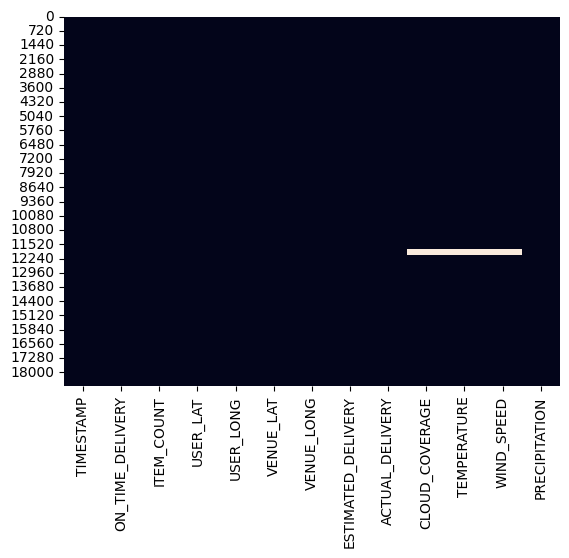

In [5]:
# Bar plot of missing values by variable

print(df.isna().sum())
sns.heatmap(df.isnull(), cbar=False)

# Show plot
plt.show()

### Handling weather missing values
CLOUD_COVERAGE, TEMPERATURE, WIND_SPEED

277 missing values (1.5% of the dataset), not much impact on our analysis

Solution: interpolation, to fill in missing values

In [6]:
null_data = df[df.isnull().values.any(axis=1)]

# We can see that the missing data is just for 10 September 2020
null_data

,TIMESTAMP,ON_TIME_DELIVERY,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY,ACTUAL_DELIVERY,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
11778,2020-09-10 06:22:00,-1,2,60.175,24.922,60.179,24.922,21,20,NaN,NaN,NaN,0.0
11779,2020-09-10 06:29:00,4,1,60.159,24.944,60.162,24.939,22,26,NaN,NaN,NaN,0.0
11780,2020-09-10 06:31:00,1,2,60.162,24.926,60.168,24.938,25,26,NaN,NaN,NaN,0.0
11781,2020-09-10 06:38:00,-7,2,60.161,24.937,60.168,24.930,23,16,NaN,NaN,NaN,0.0
11782,2020-09-10 07:00:00,7,2,60.170,24.956,60.178,24.949,30,37,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,2020-09-10 18:56:00,-10,4,60.172,24.956,60.178,24.949,34,24,NaN,NaN,NaN,0.0
12051,2020-09-10 19:07:00,4,1,60.178,24.929,60.168,24.930,23,27,NaN,NaN,NaN,0.0
12052,2020-09-10 19:09:00,11,6,60.156,24.932,60.168,24.930,23,34,NaN,NaN,NaN,0.0
12053,2020-09-10 19:43:00,-7,2,60.160,24.936,60.168,24.939,26,19,NaN,NaN,NaN,0.0


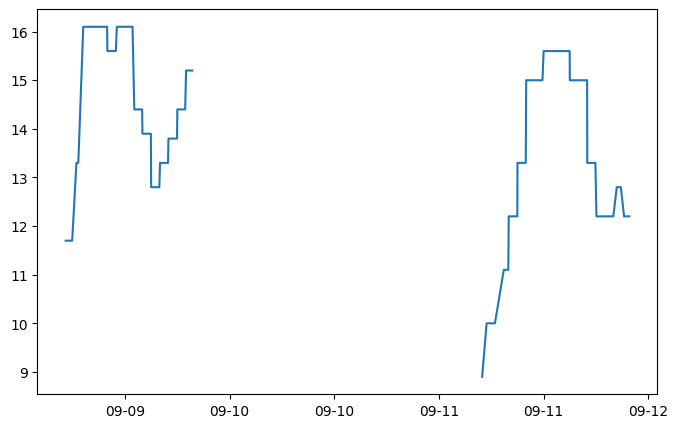

In [9]:
# Plot the temperature for 9-11 September 2020 
# Define the date range
start_date = '2020-09-09'
end_date = '2020-09-12'
filtered_df = df[(df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] < end_date)]

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(filtered_df['TIMESTAMP'], filtered_df['TEMPERATURE'] )

# Set x axis formaters to not have tick labels overlap each other
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
# plt.xticks(rotation=45)

In [10]:
df_interpolated = df.copy()

In [11]:
# Interpolation for numeric columns
df_interpolated['CLOUD_COVERAGE'] = df_interpolated['CLOUD_COVERAGE'].interpolate(method='linear')
df_interpolated['TEMPERATURE'] = df_interpolated['TEMPERATURE'].interpolate(method='linear')
df_interpolated['WIND_SPEED'] = df_interpolated['WIND_SPEED'].interpolate(method='linear')

In [12]:
df_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TIMESTAMP           18706 non-null  datetime64[ns]
 1   ON_TIME_DELIVERY    18706 non-null  int64         
 2   ITEM_COUNT          18706 non-null  int64         
 3   USER_LAT            18706 non-null  float64       
 4   USER_LONG           18706 non-null  float64       
 5   VENUE_LAT           18706 non-null  float64       
 6   VENUE_LONG          18706 non-null  float64       
 7   ESTIMATED_DELIVERY  18706 non-null  int64         
 8   ACTUAL_DELIVERY     18706 non-null  int64         
 9   CLOUD_COVERAGE      18706 non-null  float64       
 10  TEMPERATURE         18706 non-null  float64       
 11  WIND_SPEED          18706 non-null  float64       
 12  PRECIPITATION       18706 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(4)
mem

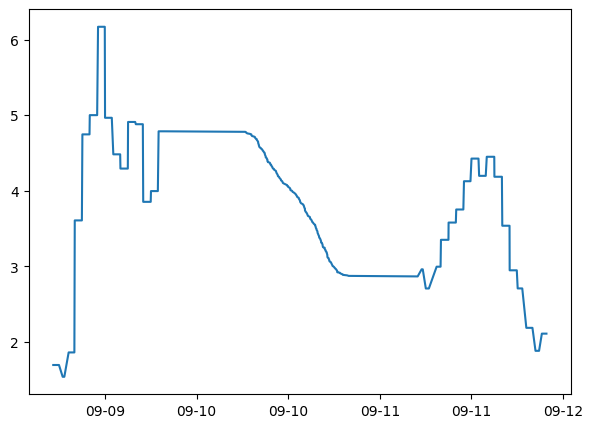

In [13]:
# Plot the temperature for 9-11 September 2020 again
df_interpolated_filtered = df_interpolated[(df_interpolated['TIMESTAMP'] >= start_date) & (df_interpolated['TIMESTAMP'] < end_date)]

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(df_interpolated_filtered['TIMESTAMP'], df_interpolated_filtered['WIND_SPEED'] )
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
# plt.xticks(rotation=45)

In [14]:
# Apply rounding to the interpolated values
df_interpolated['TEMPERATURE'] = df_interpolated['TEMPERATURE'].apply(lambda x: round(x, 1))
df_interpolated['WIND_SPEED'] = df_interpolated['WIND_SPEED'].apply(lambda x: round(x, 5))

In [15]:
# Save simply to /data/orders.csv
df_interpolated.to_csv('data/orders.csv', index=False)